# 处理fastq测序文件

## 先将fastq测序文件上传至fastq/exp?/f （正向读取文件）和fastq/exp?/r （反向读取文件） 后 执行下面的代码块进行标准化重命名

In [2]:
# 配置处理路径
DES_FOLDER = "exp1"

In [9]:
import os

f_path = "fastq/" + DES_FOLDER + "/f"
r_path = "fastq/" + DES_FOLDER + "/r"
ffs = os.listdir(f_path)
rfs = os.listdir(r_path)


# for file in ffs:
#     file_name = os.path.splitext(file)[0]
    
#     try:
#         file_index = file_name.split("H")[1][0]
#     except:
#         continue

#     file_type = os.path.splitext(file)[1]
#     if file_type == ".fq":
#         old_file_path = os.path.join(f_path, file)
#         new_file_path = os.path.join(f_path, str(file_index) + file_type)
#         print(old_file_path, new_file_path)
#         os.rename(old_file_path, new_file_path)

# print("正向测序文件重命名完成")

# for file in rfs:
#     file_name = os.path.splitext(file)[0]
    
#     try:
#         file_index = file_name.split("H")[1][0]
#     except:
#         continue
#     file_type = os.path.splitext(file)[1]
#     if file_type == ".fq":
#         old_file_path = os.path.join(r_path, file)
#         new_file_path = os.path.join(r_path, str(file_index) + file_type)
#         print(old_file_path, new_file_path)
#         os.rename(old_file_path, new_file_path)

# print("反向测序文件重命名完成")

# 读取fastq文件

In [10]:
import Functions.Strand as strand
import os

In [11]:
symbles = [
    'FP1-FP1-Hello World!!!!-RP2-RP1',
    'FP1-FP1-I Love TJU(^ ^)-RP3-RP1',
    'FP1-FP1-uncopyrightable-RP1-RP2',
    'FP1-FP2-abiogenetically-RP1-RP1',
    'FP1-FP2-aboriginalities-RP2-RP1',
    'FP1-FP2-absorbabilities-RP3-RP1',
    'FP1-FP2-overrefinements-RP2-RP2',
    'FP1-FP2-internationally-RP2-RP3',
    'FP1-FP3-jurisprudential-RP2-RP1',
    'FP1-FP3-interiorization-RP2-RP2',
    'FP2-FP1-lightsomenesses-RP1-RP1',
    'FP2-FP1-unimaginatively-RP1-RP3',
    'FP2-FP1-alkalinizations-RP2-RP3',
    'FP2-FP1-denationalizing-RP3-RP3',
    'FP2-FP2-intrapreneurial-RP1-RP3',
    'FP3-FP1-gentlemanliness-RP2-RP1',
    'FP3-FP2-unreliabilities-RP2-RP1',
    'FP3-FP2-disappointingly-RP3-RP2',
    'FP3-FP2-disinterestedly-RP1-RP3',
    'FP3-FP3-proletarianised-RP3-RP1'
]


all_f_seqs = [
    'CATACTCCCTGACTGACTGGATAACCCGCTGGCGATCTGACTCAATACATACATACATACT',
    'CATCATAACAGACTGGCGCTCTCCATAACCCACATTCCCCATTACCGTATAACCGTATTCT',
    'CGCCCTGTCTAGCTGGCGAACGTCCGATCTTCCTCGCTTACGCACTACCTATCTGACTCCC',
    'CTACCTATCTTCCTGGCTCGCTCCCTGTCTCCCGCACTTCCTAGCTACCTGACTGACGTCC',
    'CTACCTATCTGGCGATCTTCCTCGCTTCCTGTCTACCTGACTTCCGCACTTCCTCCCGAGC',
    'CTACCTATCGAGCTGGCGATCTATCTACCTATCTTCCTGACTTCCGCACTTCCTCCCGAGT',
    'CTGGCGCTCTCCCGATCGATCTCCCTCTCTTCCTGTCTCCCTGCCTCCCTGTCGCACGAGT',
    'CTTCCTGTCGCACTCCCGATCTGTCTACCGCACTTCCTGGCTGTCTACCTGACTGACGTCC',
    'CTTTCGCCCGATCTTCCGAGCGAACGATCGCCCTCACTCCCTGTCGCACTTCCTACCTGAT',
    'CTTCCTGTCGCACTCCCGATCTTCCTGGCGATCTTCCGTTCTACCGCACTTCCTGGCTGTC',
    'CTGACTTCCTCGCTTACGCACGAGCTGGCTGCCTCCCTGTCTCCCGAGCGAGCTCCCGAGC',
    'CGCCCTGTCTTCCTGCCTACCTCGCTTCCTGTCTACCGCACTTCCGCTCTCCCTGACGTCT',
    'CTACCTGACTTGCTACCTGACTTCCTGTCTTCCGTTCTACCGCACTTCCTGGCTGTCGAGC',
    'CTCACTCCCTGTCTACCGCACTTCCTGGCTGTCTACCTGACTTCCGTTCTTCCTGTCTCGC',
    'CTTCCTGTCGCACGATCTACCGAACGATCTCCCTGTCTCCCGCCCGATCTTCCTACCTGAC',
    'CTCGCTCCCTGTCGCACTGACTCCCTGCCTACCTGTCTGACTTCCTGTCTCCCGAGCGAGC',
    'CGCCCTGTCGATCTCCCTGACTTCCTACCTATCTTCCTGACTTCCGCACTTCCTCCCGAGT',
    'CTCACTTCCGAGCTACCGAACGAACTGGCTTCCTGTCGCACTTCCTGTCTCGCTGACGTCT',
    'CTCACTTCCGAGCTTCCTGTCGCACTCCCGATCTCCCGAGCGCACTCCCTCACTGACGTCC',
    'CGAACGATCTGGCTGACTCCCGCACTACCGATCTTCCTACCTGTCTTCCGAGCTCCCTCAC'
]

all_r_seqs = []
for seq in all_f_seqs:
    all_r_seqs.append(strand.get_complement_strand(seq))

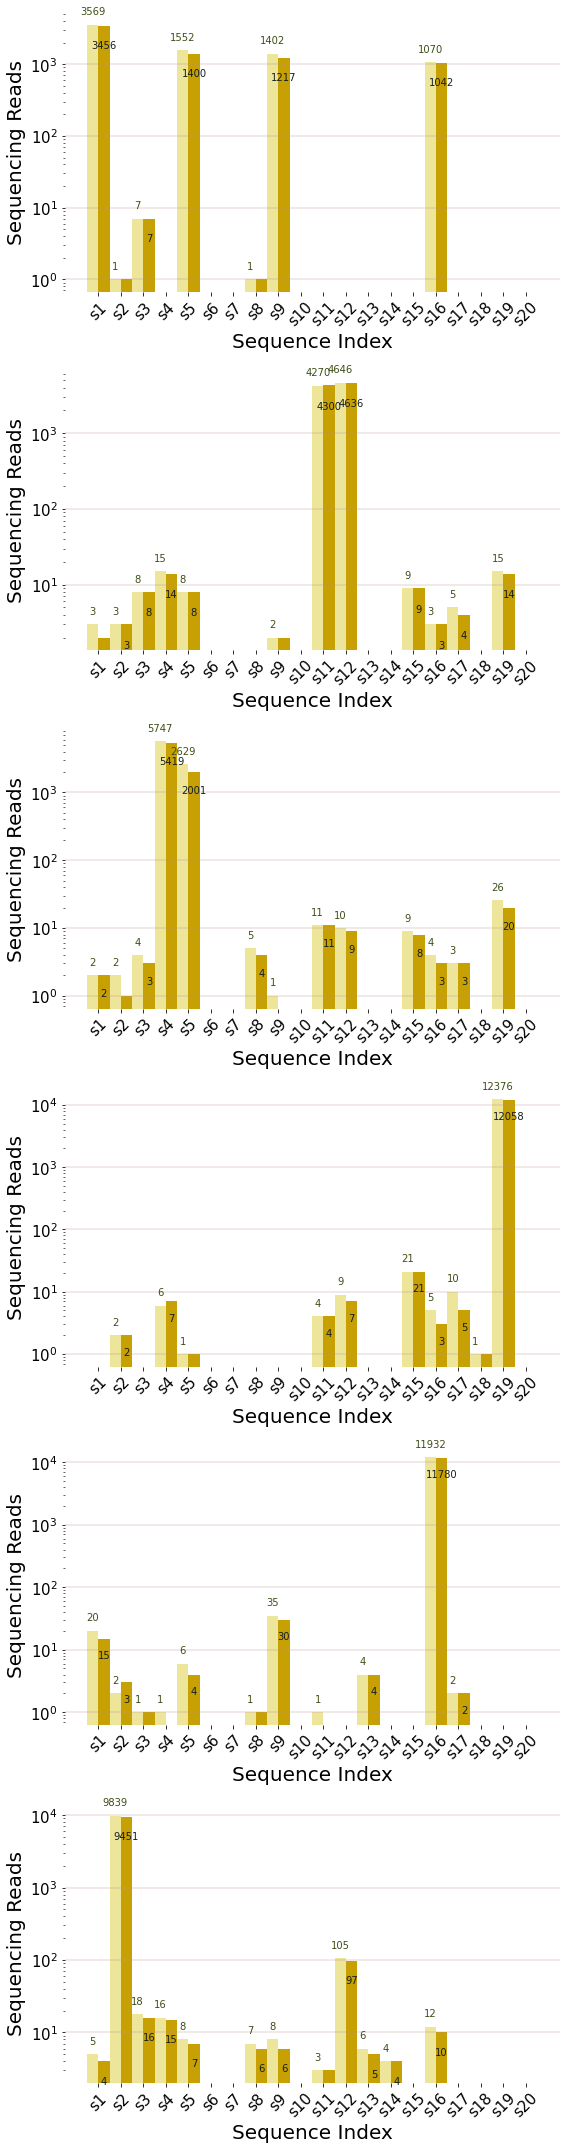

In [76]:
import mappy as mp
import operator
import matplotlib.pyplot as plt
import numpy as np


all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]

ffs = os.listdir(f_path)
total_f_count = 0
for file in ffs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_f_count += 1
    else:
        continue
rfs = os.listdir(r_path)
total_r_count = 0
for file in rfs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_r_count += 1
    else:
        continue

x = [i+1 for i in range(len(symbles))]
x_tag = ["s"+str(i) for i in range(1, 21)]
plt.figure(figsize=(15,5*total_f_count)) 
for file_index in range(total_f_count):
    all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]
    all_r_seq_counts = [0 for _ in range(len(all_r_seqs))]
    
    mp_data = mp.fastx_read(f_path + "/" + str(file_index+1) + ".fq", read_comment=True)
    mp_data_r = mp.fastx_read(r_path + "/" + str(file_index + 1) + ".fq", read_comment=True)
    read_count = 0

    for read in mp_data:
        for seq in all_f_seqs:
            if operator.contains(read[1], seq):
                all_f_seq_counts[all_f_seqs.index(seq)] += 1
    read_count += 1
    plt.subplot(total_f_count, 2, (file_index)*2 + 1)
    all_f_seq_counts = np.array(all_f_seq_counts, dtype=np.float)
    barh = plt.bar([i+0.75 for i in range(len(symbles))], all_f_seq_counts, color='#EDE599', width=0.5, label="Forward read")
    plt.bar_label(barh, label_type="edge", color='#3D4E17', padding=8, fontsize=10)
    plt.xticks(rotation=45)
    # plt.title(str(file_index))
        
    for read in mp_data_r:
        for seq in all_r_seqs:
            if operator.contains(read[1], seq):
                all_r_seq_counts[all_r_seqs.index(seq)] += 1
        
    # plt.subplot(total_f_count, 2, (file_index+1)*2)
    
    all_r_seq_counts = np.array(all_r_seq_counts, dtype=np.float)
    barh = plt.bar([i+1.25 for i in range(len(symbles))], all_r_seq_counts, color='#C7A003', width=0.5, label="Reversed read")
    plt.bar_label(barh, label_type="center", color='#151F1E', padding=2, fontsize=10)
    plt.xticks(x, x_tag, fontsize=15)
    plt.yticks(fontsize=15)
    # plt.legend(fontsize=20)
    plt.yscale('log')
    plt.ylabel("Sequencing Reads", fontsize=20)
    plt.xlabel("Sequence Index", fontsize=20)
    
    ax=plt.gca()  #gca:get current axis得到当前轴
    #设置图片的右边框和上边框为不显示
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')
    plt.grid(axis='y',linewidth=0.4, c='rosybrown')

plt.tight_layout()
plt.savefig("fig.jpg", dpi=500)
plt.show()


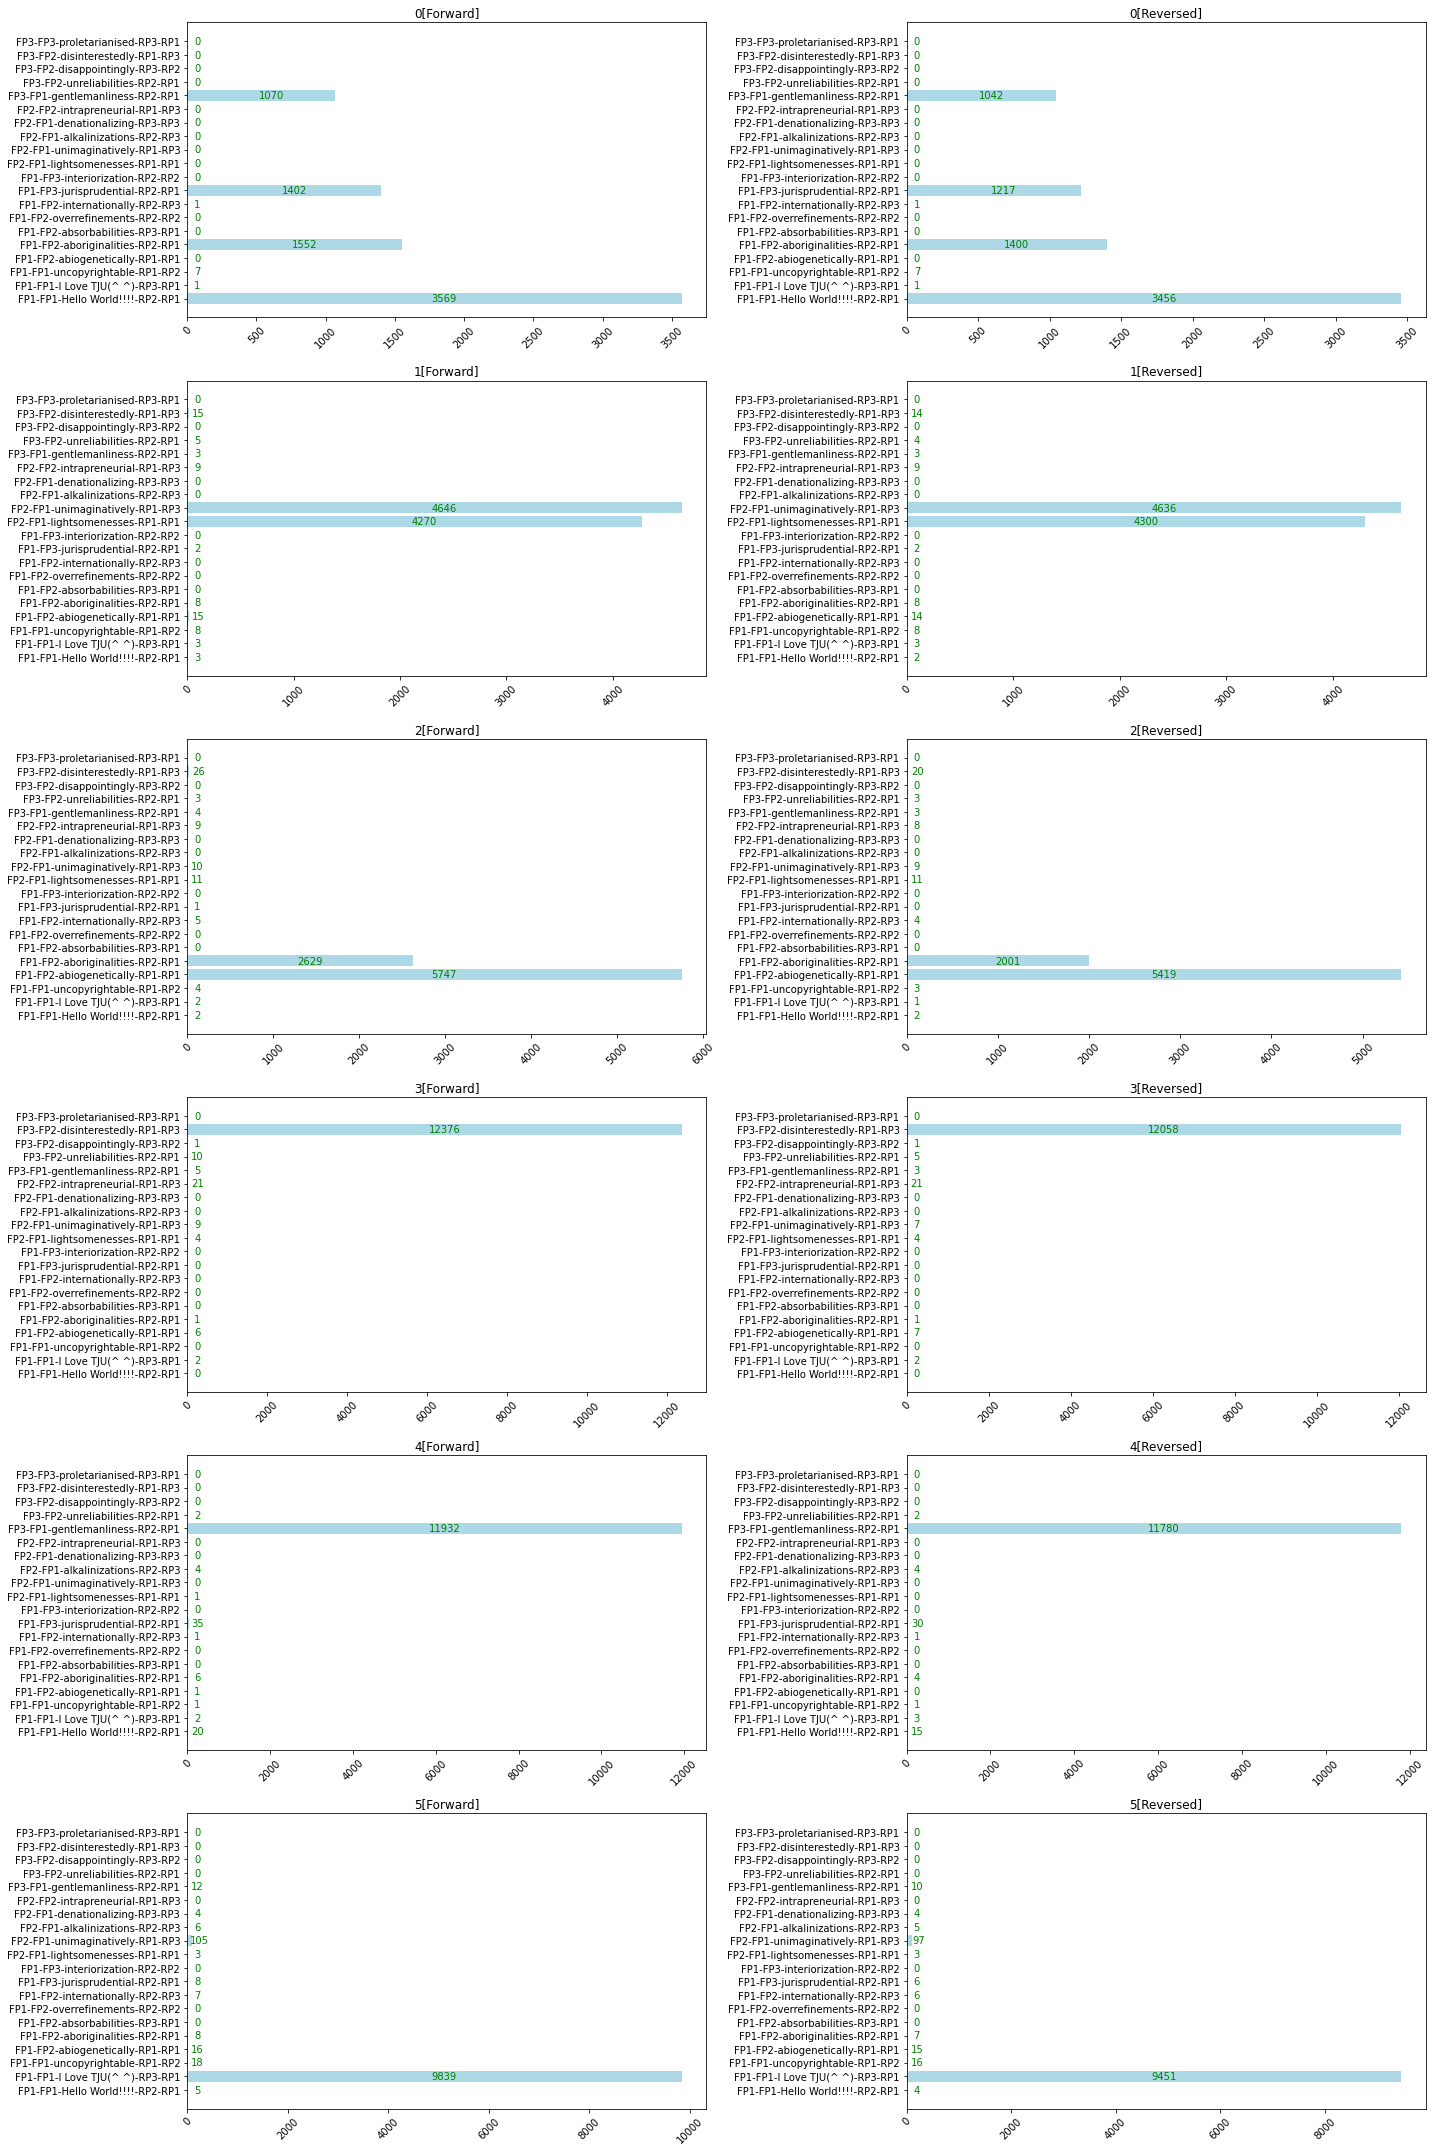

In [77]:
import mappy as mp
import operator
import matplotlib.pyplot as plt
import numpy as np


all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]

ffs = os.listdir(f_path)
total_f_count = 0
for file in ffs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_f_count += 1
    else:
        continue
rfs = os.listdir(r_path)
total_r_count = 0
for file in rfs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_r_count += 1
    else:
        continue


plt.figure(figsize=(20,5*total_f_count)) 
for file_index in range(total_f_count):
    all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]
    all_r_seq_counts = [0 for _ in range(len(all_r_seqs))]
    
    mp_data = mp.fastx_read(f_path + "/" + str(file_index+1) + ".fq", read_comment=True)
    mp_data_r = mp.fastx_read(r_path + "/" + str(file_index + 1) + ".fq", read_comment=True)
    read_count = 0

    for read in mp_data:
        for seq in all_f_seqs:
            if operator.contains(read[1], seq):
                all_f_seq_counts[all_f_seqs.index(seq)] += 1
    read_count += 1
    plt.subplot(total_f_count, 2, (file_index)*2 + 1)
    barh = plt.barh(range(len(symbles)), all_f_seq_counts, tick_label=symbles, color='lightblue')
    plt.bar_label(barh, label_type="center", color='green', padding=10)
    plt.xticks(rotation=45)
    plt.title(str(file_index) + "[Forward]")
        
    for read in mp_data_r:
        for seq in all_r_seqs:
            if operator.contains(read[1], seq):
                all_r_seq_counts[all_r_seqs.index(seq)] += 1
        
    plt.subplot(total_f_count, 2, (file_index+1)*2)
    barh = plt.barh(range(len(symbles)), all_r_seq_counts, tick_label=symbles, color='lightblue')
    plt.bar_label(barh, label_type="center", color='green', padding=10)
    plt.xticks(rotation=45)
    plt.title(str(file_index) + "[Reversed]")


plt.tight_layout()
plt.savefig("fig.jpg", dpi=400)
plt.show()


# 结果绘图

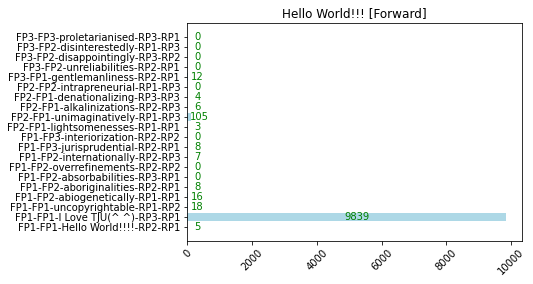

In [78]:
import matplotlib.pyplot as plt
import numpy as np

barh = plt.barh(range(len(symbles)), all_f_seq_counts, tick_label=symbles, color='lightblue')
plt.bar_label(barh, label_type="center", color='green', padding=10)
plt.xticks(rotation=45)
#plt.figure(figsize=(30,40)) 
plt.title("Hello World!!! [Forward]")
fig = plt.gcf()
plt.show()
fig.tight_layout()
fig.savefig("fig.jpg", dpi=400)

In [103]:
import math

MAX_OF_PRIMER_LIB = 12396

x = np.arange(1, 1e5, 1)
y1 = np.arange(1, 12397, 1)

y2 = np.ceil(2*np.power(x, np.ones_like(x)/2/1))
y3 = np.ceil(2*np.power(x, np.ones_like(x)/2/2))
y4 = np.ceil(2*np.power(x, np.ones_like(x)/2/3))

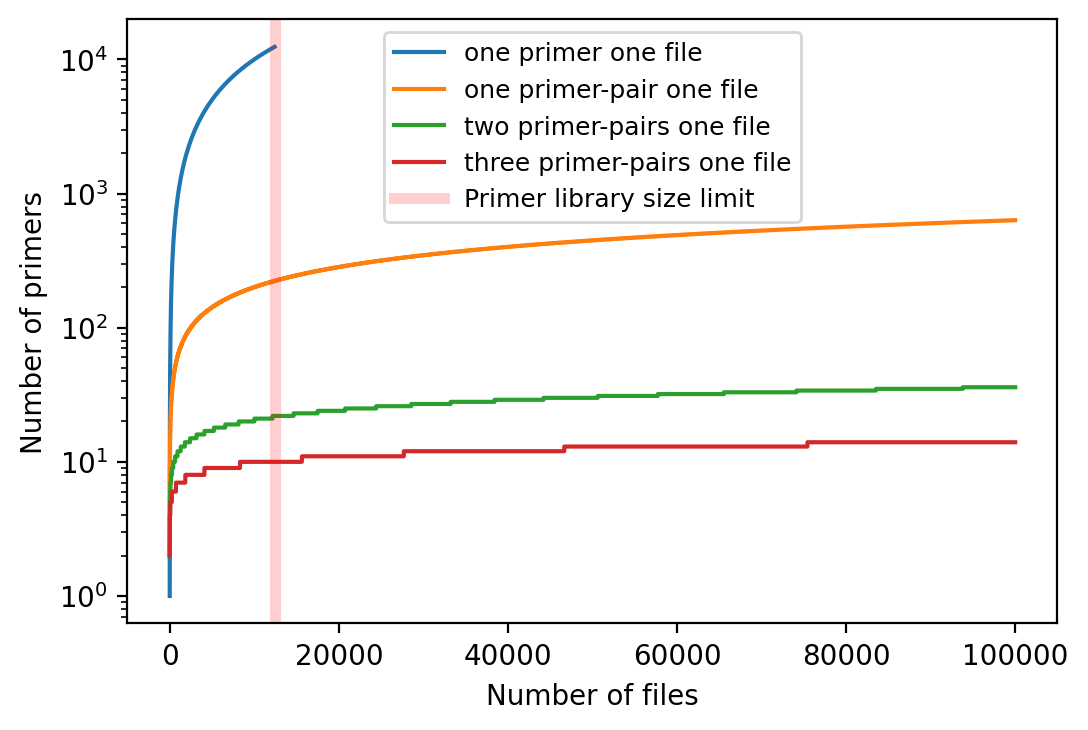

In [121]:
plt.figure(dpi=200)

plt.plot(x[:12396], y1, label="one primer one file")
plt.plot(x, y2, label="one primer-pair one file")
plt.plot(x, y3, label="two primer-pairs one file")
plt.plot(x, y4, label="three primer-pairs one file")

plt.axvline(12396, linewidth=4, c="#ff000030", label="Primer library size limit")
plt.ylabel("Number of primers")
plt.xlabel("Number of files")
plt.yscale('log')
plt.legend(fontsize=9)

plt.show()

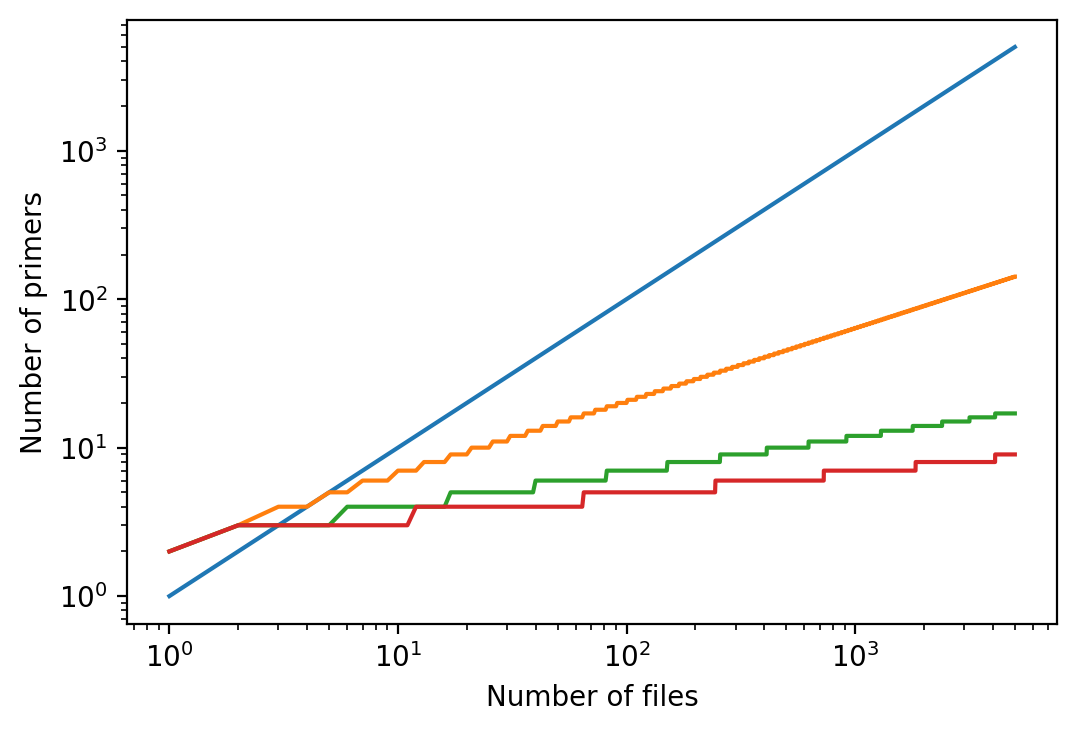

In [127]:
x = np.arange(1, 5000, 1)
y1 = np.arange(1, 5000, 1)

y2 = np.ceil(2*np.power(x, np.ones_like(x)/2/1))
y3 = np.ceil(2*np.power(x, np.ones_like(x)/2/2))
y4 = np.ceil(2*np.power(x, np.ones_like(x)/2/3))

plt.figure(dpi=200)

plt.plot(x, y1, label="one primer one file")
plt.plot(x, y2, label="one primer-pair one file")
plt.plot(x, y3, label="two primer-pairs one file")
plt.plot(x, y4, label="three primer-pairs one file")

plt.ylabel("Number of primers")
plt.xlabel("Number of files")
plt.yscale("log")
plt.xscale("log")
# plt.legend(fontsize=9)

plt.show()